In [53]:
import pandas as pd
import numpy as np

# Import Data

In [67]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep = '\t')

In [68]:
import re

In [69]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [70]:
df.shape

(1000, 2)

# Preprocessing

In [71]:
pre = []

for i in df['Review']:
  s = i.lower()
  s= re.sub('[^a-z ]','',s)
  pre.append(s)

In [72]:
pre[0:5]

['wow loved this place',
 'crust is not good',
 'not tasty and the texture was just nasty',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it',
 'the selection on the menu was great and so were the prices']

In [73]:
df['Processed'] = pre

In [74]:
df.head()

,Review,Liked,Processed
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


# Vectorization

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tfidf = TfidfVectorizer()

In [77]:
X = tfidf.fit_transform(df['Processed']).toarray()

In [78]:
y = df['Liked']

In [85]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


# Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=21)

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model Building

In [107]:
model = Sequential()

model.add(Dense(250,activation ='relu', input_dim = X.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(126,activation ='relu', input_dim = X.shape[1]))
model.add(Dropout(0.4))

model.add(Dense(1,activation ='sigmoid'))


In [108]:
early_stop = EarlyStopping(monitor = 'val_loss',patience =5)

In [109]:
model.compile(optimizer ='adam',loss ='binary_crossentropy', metrics = ['accuracy'])

In [110]:
history = model.fit(xtrain,ytrain,epochs =20,validation_split = 0.2,callbacks =[early_stop])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.4723 - loss: 0.6925 - val_accuracy: 0.4938 - val_loss: 0.6894
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6936 - loss: 0.6728 - val_accuracy: 0.6062 - val_loss: 0.6708
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8760 - loss: 0.6039 - val_accuracy: 0.7750 - val_loss: 0.5918
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9535 - loss: 0.4134 - val_accuracy: 0.8062 - val_loss: 0.4654
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9823 - loss: 0.1700 - val_accuracy: 0.7563 - val_loss: 0.4529
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9904 - loss: 0.0702 - val_accuracy: 0.7563 - val_loss: 0.4422
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9939 - loss: 0.0313 - val_accuracy: 0.7500 - val_loss: 0.5193
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.7750 - v

In [111]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9926 - loss: 0.0188


[0.1127738207578659, 0.9524999856948853]

In [112]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.4123  


[0.5110446810722351, 0.7850000262260437]

# Plotting error decrease for each epoch

In [120]:
import matplotlib.pyplot as plt

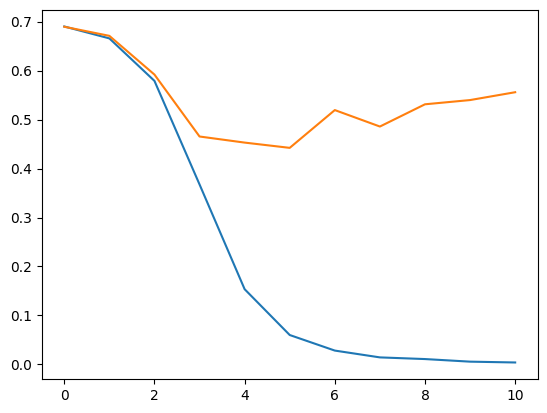

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Evaluation

In [113]:
from sklearn.metrics import confusion_matrix ,classification_report

In [115]:
y_prob = model.predict(xtest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [116]:
y_pred = np.where(y_prob>0.5 ,1,0)

In [130]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       102
           1       0.74      0.86      0.80        98

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



In [117]:
cf = confusion_matrix(ytest,y_pred)

In [118]:
import seaborn as sns

<Axes: >

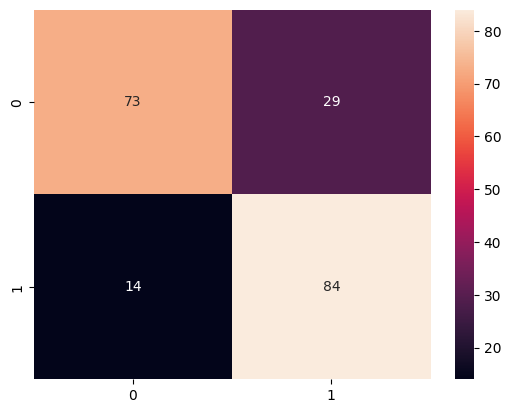

In [119]:
sns.heatmap(cf ,annot=True)

# Testing

In [134]:
text = input('Enter any review : ')
text = text.lower()
text = re.sub('[^a-z ]','',text)

x = tfidf.transform([text]).toarray()
prob = model.predict(x)

if prob>=0.5:
    print('The given review is Positive')
else:
    print('The given review is Negative')

Enter any review : Tasty food
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The given review is Positive


In [133]:
text = input('Enter any review : ')
text = text.lower()
text = re.sub('[^a-z ]','',text)

x = tfidf.transform([text]).toarray()
prob = model.predict(x)

if prob>=0.5:
    print('The given review is Positive')
else:
    print('The given review is Negative')

Enter any review : hair in food
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The given review is Negative
